# **Loading the Dataset**

In [ ]:
# ! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# making a directory for kaggle at the temporary instance location on Colab drive
! mkdir ~/.kaggle


#/content/drive/MyDrive/KaggleStuff/kaggle.json

In [ ]:
# Uploading the json file to Google Drive and then copying to the temporary location

!cp /content/drive/MyDrive/KaggleStuff/kaggle.json ~/.kaggle

In [ ]:
#Change the file permissions to read/write to the owner only

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kumarvishal88/ml-assignment-2-dataset

100% 567k/567k [00:00<00:00, 925kB/s]
100% 567k/567k [00:00<00:00, 925kB/s]


# **Import**

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
import os
import zipfile
import pandas as pd

In [ ]:
# for dirname, _, filenames in os.walk('/content/KaggleStuff'):
#   for filename in filenames:
#     print(os.path.join(dirname,filename))

In [ ]:
# Extracting all data files
with zipfile.ZipFile("/content/ml-assignment-2-dataset.zip","r") as z:
  z.extractall(".")

In [ ]:
# Loading the csv data
airplane_data = pd.read_csv("/content/Airplane.csv")
salary_data = pd.read_csv("/content/Salary.csv")

# Viewing the Dataset

In [ ]:
# Visualizing the first few entries of airplane data
airplane_data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [ ]:
# Viewing the shape/dimensions of the airplane dataset
airplane_data.shape

(5268, 13)

In [ ]:
# Visualizing the first few entries of salary data
salary_data

,First Name,Last Name,Education,Occupation,Experience (Years),Salary
0,Freddie,Smith,Doctoral,Baker,8,142875
1,Robert,Ferguson,Primary,Economist,12,61430
2,Adele,Harrison,Primary,Electrician,17,121282
3,Miranda,Alexander,Doctoral,Producer,8,35637
4,Julia,Cole,Primary,Agronomist,24,75653
...,...,...,...,...,...,...
195,Oscar,Ferguson,Bachelor,Producer,29,74836
196,Arthur,Scott,Upper secondary,Geologist,19,115026
197,Abigail,Clark,Master,Mathematician,24,152707
198,Harold,Owens,Upper secondary,Geologist,5,172473


In [ ]:
# Viewing the shape/dimensions of the salary dataset
salary_data.shape

(200, 6)

In [ ]:
adkfjaskj = salary_data["Education"]
adkfjaskj

0             Doctoral
1              Primary
2              Primary
3             Doctoral
4              Primary
            ...       
195           Bachelor
196    Upper secondary
197             Master
198    Upper secondary
199           Bachelor
Name: Education, Length: 200, dtype: object

# Supervised Learning

## Regression Class

In [ ]:
class LinearRegression():

  def __init__(self, X, y):

    self.X = X
    self.y = y

    # Adding a column of ones to X for the intercept term
    self.X = np.column_stack((np.ones(self.X.shape[0]), self.X))



  def calculate_coefficients(self):

    """ Calculating the coefficients using the normal equation beta = (X^T * X)^(-1) * X^T * Y """

    X_calc = self.X
    y_calc = self.y
    coefficients = np.linalg.inv(X_calc.T.dot(X_calc)).dot(X_calc.T).dot(y_calc)
    self.coefficients = coefficients

    return coefficients


  def predict(self):

    """ Predicting salaries using the coefficients """

    y_pred = self.X.dot(self.coefficients)
    self.y_pred = y_pred

    return y_pred


  def calculate_RSquare(self):

    y_mean = np.mean(self.y) # Calculating the mean of observed values
    TSS = np.sum((self.y - y_mean) ** 2) # Calculate the total sum of squares (TSS)
    RSS = np.sum((self.y - self.y_pred) ** 2) # Calculate the residual sum of squares (RSS)
    R_squared = 1 - (RSS / TSS) # Calculate R-squared
    self.R_squared = R_squared

    return R_squared




## Dataframe Functions

In [ ]:
# Sample DataFrame as a list of lists

def dimensions_dataframe(dictionary_data):

  columns = []
  for i in dictionary_data:
    columns.append(i)
  rows = len(dictionary_data[columns[0]])
  columns = len(dictionary_data.keys())

  return rows, columns

def print_dataframe_tillk(dictionary_data, k):
  columns = []
  for i in dictionary_data:
    columns.append(i)

  n_rows, n_cols = dimensions_dataframe(dictionary_data)

  for i in columns:
    print(i,end=" ")

  print()

  for i in range(k):
    for j in columns:
      print(dictionary_data[j][i],end=" ")
    print()

def print_dataframe(dictionary_data):
  columns = []
  for i in dictionary_data:
    columns.append(i)

  n_rows, n_cols = dimensions_dataframe(dictionary_data)

  for i in columns:
    print(i,end=" ")

  print()

  for i in range(n_rows):
    for j in columns:
      print(dictionary_data[j][i],end=" ")
    print()


def copy_dataframe(data):
  columns = []
  df = {}
  for i in data:
    columns.append(i)
    df[i] = []


  for j in columns:

    column_list = []
    for i in range(len(data)):
      column_list.append(data[j][i])

    df[j] = column_list


  return df


def dropna_dataframe(data, columns_tocheck):
  columns = []
  df = {}
  for i in data:
    columns.append(i)
    df[i] = []

  na_index_list = []

  for j in columns:

    column_list = []
    for i in range(len(data)):
      element = data[j][i]
      if element is None or (isinstance(element, float) and math.isnan(element)):
        if j in columns_tocheck:
          na_index_list.append(i)
          # print(f"NA/NAN/None value found at row: {i}, column: {j}")

  print("HERE",na_index_list)

  for j in columns:
    column_list = []

    for i in range(len(data)):
      if i not in na_index_list:
        column_list.append(data[j][i])

    df[j] = column_list



  return df

def get_values_dataframe(dictionary_data, column):
  return dictionary_data[column]


def getcols_dataframe(dictionary_data, columnlist):
  new_dict = {}

  for i in dictionary_data:
    if i in columnlist:
      new_dict[i] = dictionary_data[i]

  return new_dict



200

In [ ]:
dimensions_dataframe(copy_dataframe(airplane_data))[0]


5268

In [ ]:
dimensions_dataframe(dropna_dataframe(airplane_data, ["Type"]))

## Functions

In [420]:

def label_encode(dataframe, column_to_encode):

  """ Perform label encoding """
  df_copy = dataframe.copy()
  encoding_dict = {}
  encoded_list = []

  k = 1
  for i in range(len(df_copy)):

    element = df_copy.loc[i, column_to_encode]
    if element not in encoding_dict:
      encoding_dict[element] = k
      k+=1

    encoded_list.append(encoding_dict[element])


  df_copy[column_to_encode+' Encoded'] = encoded_list
  return df_copy


def label_encode_alphabetically(dataframe, column_to_encode):
  """ Perform label encoding alphabetically """

  # dataframe is a DICTIONARY

  df_copy = dataframe #.copy()

  list_of_values = df_copy[column_to_encode] #.values
  # list_of_values_copy = []
  # for i in list_of_values:
  #   if i==float("nan") or i is None:
  #     continue
  #   else:
  #     list_of_values_copy.append(i)

  alphabetical_list = list(np.unique(list_of_values))

  # print(alphabetical_list)

  encoding_dict = {}
  k = 1

  for i in alphabetical_list:
    encoding_dict[i] = k
    k += 1

  encoded_list = []
  for i in range(dimensions_dataframe(df_copy)[0]):
    # element = df_copy.loc[i, column_to_encode]
    element = df_copy[column_to_encode][i]
    encoded_list.append(encoding_dict[element])


  df_copy[column_to_encode+' Encoded'] = encoded_list
  return df_copy

# categories = data[x_values[i]].values

#         # Find unique categories
#         unique_categories = np.unique(categories)

#         print(unique_categories)

#         #Perform Label Encoding
#         encoded_dict={}
#         ctr=1
#         for occup in unique_categories:
#             encoded_dict[occup]=ctr
#             ctr+=1


# def label_encoding_alpha(df, column_name):
#     # Extract the categorical variable
#     categories = df[column_name].values

#     # Find unique categories
#     unique_categories = np.unique(categories)

#     #Perform Label Encoding
#     encoded_dict={}
#     ctr=1
#     for occup in unique_categories:
#         encoded_dict[occup]=ctr
#         ctr+=1

#     # Add the encoded variable to the dataframe
#     df[column_name+" Encoded"]=np.array([encoded_dict[occupation] for occupation in categories])

#     return df


In [ ]:
np.unique(get_values_dataframe(copy_dataframe(salary_data),"Education")).astype(object)
# dimensions_dataframe(copy_dataframe(airplane_data))


array(['Bachelor', 'Doctoral', 'Lower secondary', 'Master', 'Primary',
       'Upper secondary'], dtype=object)

In [ ]:
(np.unique(salary_data['Education'].values))

array(['Bachelor', 'Doctoral', 'Lower secondary', 'Master', 'Primary',
       'Upper secondary'], dtype=object)

In [ ]:
salary_data['Education']
salary_data_copy = salary_data.copy()

## Education VS Salary

In [ ]:
education_vs_salary_df = copy_dataframe(salary_data) # Creating a deep copy of the dataframe
education_vs_salary_df = getcols_dataframe(education_vs_salary_df, ['Education','Salary']) # Extracting only the relevant columns from the dataframe
print_dataframe(education_vs_salary_df) # Viewing the first few entries in the dataframe

In [ ]:
# education_vs_salary_df.Education.unique()
# np.unique(education_vs_salary_df.Education)

array(['Bachelor', 'Doctoral', 'Lower secondary', 'Master', 'Primary',
       'Upper secondary'], dtype=object)

In [ ]:
# education_sort_list = ['Primary', 'Lower secondary', 'Upper secondary', 'Bachelor', 'Master', 'Doctoral']
# education_vs_salary_df.sort_values(by = education_sort_list)

In [ ]:
education_vs_salary_df = label_encode_alphabetically(education_vs_salary_df,"Education") # Label encoding the data
print_dataframe(education_vs_salary_df)

In [ ]:
education_dict = {'Primary':1, 'Lower secondary':2, 'Upper secondary':3, 'Bachelor':4, 'Master':5, 'Doctoral':6}
for i in range(dimensions_dataframe(education_vs_salary_df)[0]):
  # element = education_vs_salary_df.loc[i,"Education"]
  # education_vs_salary_df.loc[i,"Education Encoded"] = education_dict[element]
  element = education_vs_salary_df["Education"][i]
  education_vs_salary_df["Education Encoded"][i] = education_dict[element]

print_dataframe(education_vs_salary_df)

In [ ]:
dimensions_dataframe(education_vs_salary_df)

(200, 3)

In [ ]:
# For one hot encoding, see later
# ed_vs_sal_data = pd.get_dummies(education_vs_salary_df, columns=['Education'], drop_first=True) # dropping the first one-hot encoded column to avoid multicollinearity
# ed_vs_sal_data.head()

# # Just viewing
# X_education = ed_vs_sal_data.drop('Salary', axis=1).values
# y_salary = ed_vs_sal_data['Salary'].values
# X_education[0:10], y_salary[0:10]

In [ ]:
# Just assigning the X/y values and viewing the data
X_education = np.array(education_vs_salary_df['Education Encoded'])
y_salary = np.array(education_vs_salary_df['Salary'])
X_education[0:10], y_salary[0:10]

(array([6, 1, 1, 6, 1, 6, 3, 3, 3, 6]),
 array([142875,  61430, 121282,  35637,  75653,  78059, 109988, 179030,
        161817,  64592]))

In [ ]:
education_VS_salary = LinearRegression(X = X_education, y = y_salary) # Creating an object instance of the LinearRegression Class
print(education_VS_salary.calculate_coefficients()) # Calculating the coefficients

[111263.71516129   -922.21290323]


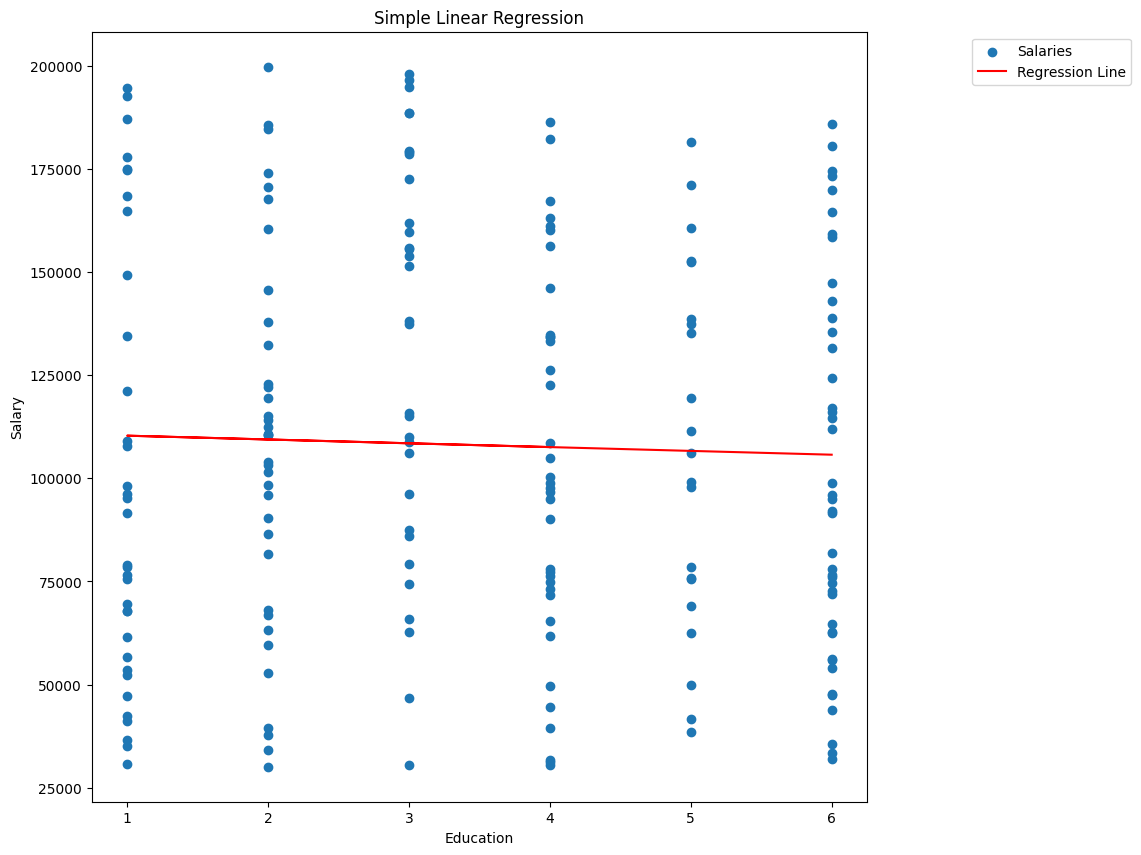

Regression Equation: Salary = 111263.72 + -922.21 * Education


In [ ]:
# Plotting the graph
X = education_VS_salary.X
y = education_VS_salary.y
predictions = education_VS_salary.predict()
coefficients = education_VS_salary.coefficients


# Visualize the results using matplotlib
plt.scatter(X[:,1], y, label='Salaries')
plt.plot(X[:,1], predictions, color='red', label='Regression Line')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.show()

# Printing the regression equation
print(f"Regression Equation: Salary = {coefficients[0]:.2f} + {coefficients[1]:.2f} * Education")

In [ ]:
# # Calculate the best-fit line
# x_values = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
# y_values = coefficients[0] + coefficients[1] * x_values

# # Plot the best-fit line
# plt.plot(x_values, y_values, color='red', linewidth=2, label='Best Fit Line')

# plt.xlabel('X')
# plt.ylabel('y')
# plt.title('Best Fit Line')
# plt.legend()
# plt.show()

In [ ]:
# Calculating R-Square
rsquare_educ_vs_salary = education_VS_salary.calculate_RSquare()
print(rsquare_educ_vs_salary)

0.0011670984323800537


## Occupation VS Salary

In [ ]:
occupation_vs_salary_df = copy_dataframe(salary_data) #.copy() # Creating a deep copy of the dataframe
occupation_vs_salary_df = getcols_dataframe(occupation_vs_salary_df, ['Occupation','Salary']) # Extracting only the relevant columns from the dataframe

occupation_vs_salary_df = label_encode_alphabetically(occupation_vs_salary_df,"Occupation") # Label encoding the data
print_dataframe(occupation_vs_salary_df) # Viewing the dataframe

In [ ]:
# Just assigning the X/y values and viewing the data
X_occupation = np.array(occupation_vs_salary_df['Occupation Encoded'])
y_salary = np.array(occupation_vs_salary_df['Salary'])
# X_occupation[0:10], y_salary[0:10]
occupation_VS_salary = LinearRegression(X = X_occupation, y = y_salary) # Creating an object instance of the LinearRegression Class
print(occupation_VS_salary.calculate_coefficients()) # Calculating the coefficients

[99343.35627517   324.41178298]


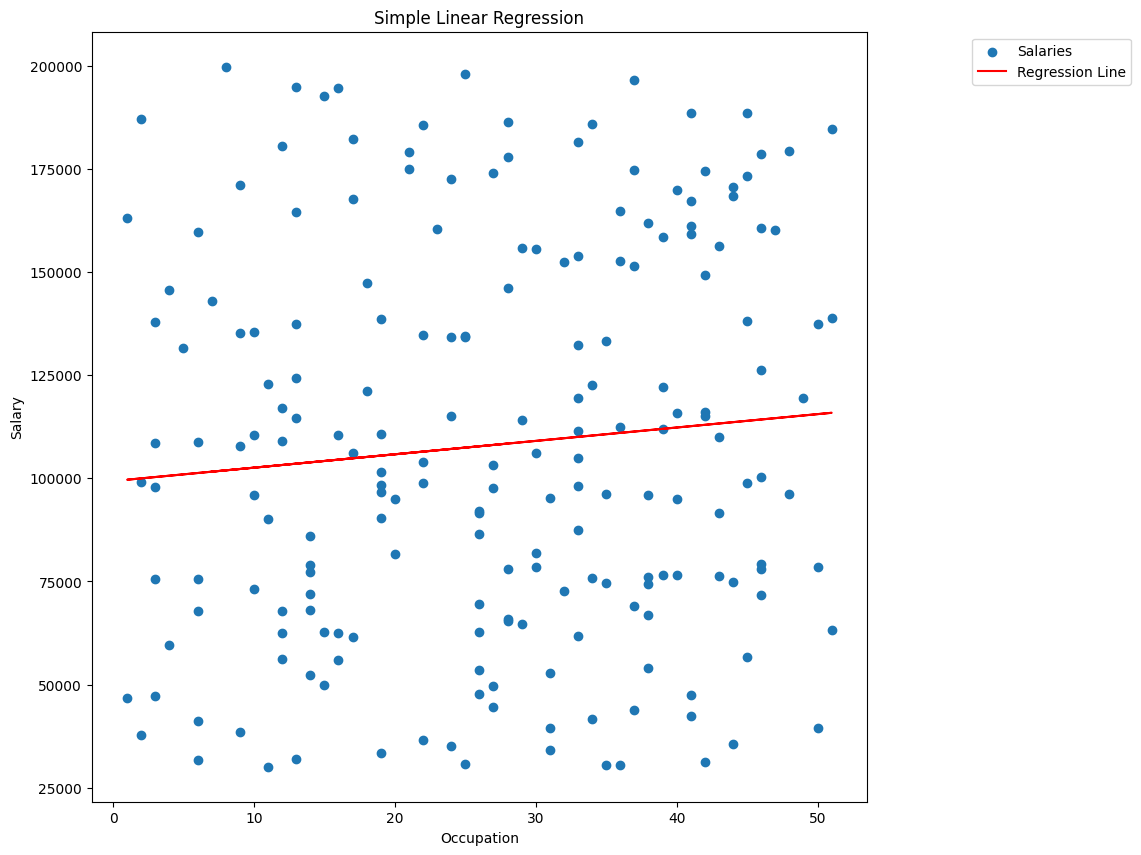

Regression Equation: Salary = 99343.36 + 324.41 * Occupation


In [ ]:
# Plotting the graph
X = occupation_VS_salary.X
y = occupation_VS_salary.y
predictions = occupation_VS_salary.predict()
coefficients = occupation_VS_salary.coefficients


# Visualize the results using matplotlib
plt.scatter(X[:,1], y, label='Salaries')
plt.plot(X[:,1], predictions, color='red', label='Regression Line')
plt.xlabel('Occupation')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.show()

# Printing the regression equation
print(f"Regression Equation: Salary = {coefficients[0]:.2f} + {coefficients[1]:.2f} * Occupation")

In [ ]:
# Calculating R-Square
rsquare_occup_vs_salary = occupation_VS_salary.calculate_RSquare()
print(rsquare_occup_vs_salary)

0.00874895101339046


## Experience VS Salary

In [ ]:
experience_vs_salary_df = copy_dataframe(salary_data) # Creating a deep copy of the dataframe
experience_vs_salary_df = getcols_dataframe(experience_vs_salary_df,['Experience (Years)','Salary']) # Extracting only the relevant columns from the dataframe

print_dataframe(experience_vs_salary_df) # Viewing the dataframe

In [ ]:
# Just assigning the X/y values and viewing the data
X_experience = np.array(experience_vs_salary_df['Experience (Years)'])
y_salary = np.array(experience_vs_salary_df['Salary'])
# X_experience[0:10], y_salary[0:10]
experience_VS_salary = LinearRegression(X = X_experience, y = y_salary) # Creating an object instance of the LinearRegression Class
print(experience_VS_salary.calculate_coefficients()) # Calculating the coefficients

[112877.48129089   -322.44497442]


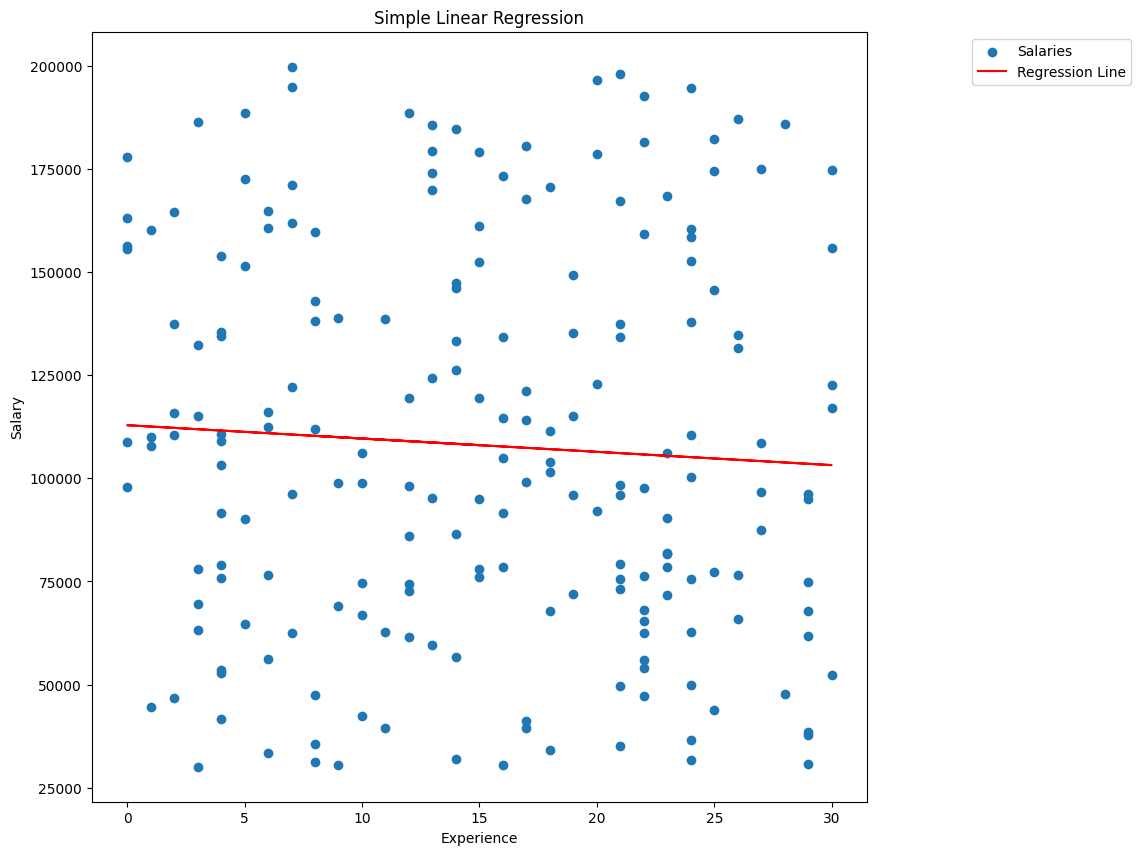

Regression Equation: Salary = 112877.48 + -322.44 * Experience


In [612]:
# Plotting the graph
X = experience_VS_salary.X
y = experience_VS_salary.y
predictions = experience_VS_salary.predict()
coefficients = experience_VS_salary.coefficients


# Visualize the results using matplotlib
plt.scatter(X[:,1], y, label='Salaries')
plt.plot(X[:,1], predictions, color='red', label='Regression Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.show()

# Printing the regression equation
print(f"Regression Equation: Salary = {coefficients[0]:.2f} + {coefficients[1]:.2f} * Experience")

In [ ]:
# Calculating R-Square
rsquare_exp_vs_salary = experience_VS_salary.calculate_RSquare()
print(rsquare_exp_vs_salary)

0.003463147394885513


### **R Square**
Education VS Salary = 0.0011670984323800537  
Occupation VS Salary = 0.00874895101339046  
Experience VS Salary = 0.003463147394885513  

The R Square values are as follows:  
`Education < Experience < Occupation`

As we can see the value of R square is very small.  
This indicates that the line/model is not a very good fit to the data.  
This makes sense since the data has multiple `Salary` values for the same `x` values (Education, Occupation, Experience). Therefore, we cannot map a function to the data so as to estimate it properly.  

From the given estimates, it would appear that knowing a person's education, occupation and experience is not indicative of their salary. However, we know in most fields there is a strong positive correlation with each of the above independent variables and salary.


## Multiple Linear Regression

In [ ]:
experience_vs_salary_df = copy_dataframe(salary_data) # Creating a deep copy of the dataframe
experience_vs_salary_df = getcols_dataframe(experience_vs_salary_df,['Experience (Years)','Salary']) # Extracting only the relevant columns from the dataframe

print_dataframe(experience_vs_salary_df) # Viewing the dataframe

In [ ]:
mlrm_df = copy_dataframe(salary_data) #.copy() # Creating a deep copy of the dataframe
mlrm_df = getcols_dataframe(mlrm_df,['Education', 'Occupation', 'Experience (Years)','Salary']) # Extracting only the relevant columns from the dataframe

mlrm_df = label_encode_alphabetically(mlrm_df,"Occupation") # Label encoding the data
mlrm_df["Education Encoded"] = education_vs_salary_df["Education Encoded"] # Encoding the data
print_dataframe(mlrm_df) # Viewing the dataframe

In [ ]:
# Just assigning the X/y values and viewing the data
# X_1 = np.array(mlrm_df['Experience (Years)'], dtype = int)
# X_2 = np.array(mlrm_df['Occupation Encoded'], dtype = int)
# X_3 = np.array(mlrm_df['Education Encoded'], dtype = int)
# X_mlrm = np.concatenate(X_1,X_2,X_3)
X_1 = mlrm_df['Experience (Years)']
X_2 = mlrm_df['Occupation Encoded']
X_3 = mlrm_df['Education Encoded']
X_mlrm = []
for i in range(dimensions_dataframe(mlrm_df)[0]):
  element_list = [X_1[i], X_2[i], X_3[i]]
  # X_mlrm.append(np.array(element_list))
  X_mlrm.append(element_list)

X_mlrm = np.array(X_mlrm)


In [ ]:
y_mlrm = np.array(mlrm_df['Salary'])
# X_mlrm[0:10], y_mlrm[0:10]
mlrm_model = LinearRegression(X = X_mlrm, y = y_mlrm) # Creating an object instance of the LinearRegression Class
print("Intercept Experience (Years) Occupation Encoded Education Encoded")
print(mlrm_model.calculate_coefficients()) # Calculating the coefficients

Intercept Experience (Years) Occupation Encoded Education Encoded
[107233.54570937   -262.78354131    319.03329289  -1085.82226269]


In [ ]:
predictions = mlrm_model.predict()
coefficients = mlrm_model.coefficients

In [ ]:
print("R Squared:", mlrm_model.calculate_RSquare())

R Squared: 0.012800420415242653


In [ ]:
# [107233.54570937   -262.78354131    319.03329289  -1085.82226269]
# [ 108035.970 20.3754775 -469.426554]

## Polynomial Regression

In [522]:
mlrm_df['Experience (Years)**2'] = list(np.array(mlrm_df['Experience (Years)'])**2)
mlrm_df['Education Encoded**2'] = list(np.array(mlrm_df['Education Encoded'])**2)
mlrm_df['Occupation Encoded**3'] = list(np.array(mlrm_df['Occupation Encoded'])**3)

In [529]:
X_1 = mlrm_df['Experience (Years)']
X_2 = mlrm_df['Occupation Encoded']
X_3 = mlrm_df['Education Encoded']
X_4 = mlrm_df['Experience (Years)**2']
X_5 = mlrm_df['Education Encoded**2']
X_6 = mlrm_df['Occupation Encoded**3']
X_pol = []
for i in range(dimensions_dataframe(mlrm_df)[0]):
  element_list = [X_1[i], X_2[i], X_3[i], X_4[i], X_5[i], X_6[i]]
  # X_mlrm.append(np.array(element_list))
  X_pol.append(element_list)

X_pol = np.array(X_pol)


In [530]:
y_pol = np.array(mlrm_df['Salary'])
pol_model = LinearRegression(X = X_pol, y = y_pol) # Creating an object instance of the LinearRegression Class
print("Intercept Experience (Years) Occupation Encoded Education Encoded Experience (Years)**2 Education Encoded**2 Occupation Encoded**3")
print(pol_model.calculate_coefficients()) # Calculating the coefficients

Intercept Experience (Years) Occupation Encoded Education Encoded Experience (Years)**2 Education Encoded**2 Occupation Encoded**3
[ 8.94898595e+04 -5.72001691e+01 -7.40965341e+01  1.53618848e+04
 -6.72386319e+00 -2.30517714e+03  1.47814779e-01]


In [531]:
predictions = pol_model.predict()
coefficients = pol_model.coefficients

In [532]:
print("R Squared:", pol_model.calculate_RSquare())

R Squared: 0.03003560125125293


### **Polynomial Regression VS MLRM**

R Square for Multiple Linear model = 0.012800420415242653  
R Square for Polynomial model = 0.03003560125125293  

Clearly the R Square for the Polynomial model is greater than that of the Multiple Linear Model. This is may be so because
1. Polynomial models can capture a variety non linear relationships whereas MLRMs can model only linear relationships.
2. Higher-degree polynomials can fit the training data better, leading to a higher R Square value. However, they may not generalize well to new data, leading to poor performance in real world applications.



## Principal Component Analysis

In [579]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components # number of components we want to have after the transformation
    self.components = None
    self.mean = None
    self.std_dev = None
    self.X = None
    self.standardised_X = None

  def fit(self, X):

    self.X = X
    # Standardizing the data (mean-centered and scaled to unit variance)
    self.mean = np.mean(X, axis=0)
    self.std_dev = np.std(X, axis=0)
    self.standardised_X = (X -  self.mean) / self.std_dev

    # calculating covariance
    covmatr = np.cov(self.standardised_X.T)

    # Computing eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covmatr)

    # eigenvectors v = [:, i] column vector, transposing for easier calculations
    eigenvectors = eigenvectors.T

    print(eigenvalues, eigenvectors)
    print()
    print()

    # sorting eigenvectors according to eigenvalues
    idxs = np.argsort(eigenvalues)[::-1] # sorting in decreasing order
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    print(eigenvalues, eigenvectors)

    self.components = eigenvectors[:self.n_components] # saving the first n_components


    pca_result = np.dot(self.standardised_X, self.components.T)

    return pca_result, self.components, eigenvalues


  def transform(self, X):

    """ projects data """
    # X = X - self.mean

    return np.dot(X, self.components.T)





In [ ]:
supervised_pca_df = copy_dataframe(salary_data) # .copy()
supervised_pca_df = label_encode_alphabetically(supervised_pca_df,"Occupation") # Label encoding the data
supervised_pca_df["Education Encoded"] = education_vs_salary_df["Education Encoded"] # Encoding the data

print_dataframe(supervised_pca_df)

In [581]:
y_supervised_pca = supervised_pca_df["Salary"]

X_1 = supervised_pca_df['Experience (Years)']
X_2 = supervised_pca_df['Education Encoded']
X_3 = supervised_pca_df['Occupation Encoded']
supervised_pca_df_fin = []
for i in range(dimensions_dataframe(supervised_pca_df)[0]):
  element_list = [X_1[i], X_2[i], X_3[i]]
  # X_mlrm.append(np.array(element_list))
  supervised_pca_df_fin.append(element_list)

supervised_pca_df_fin = np.array(supervised_pca_df_fin)


In [582]:
supervised_pca_df = supervised_pca_df_fin

In [595]:
pca_ele = PCA(2)
# pca_projected, throw1, throw2 = pca_ele.fit(supervised_pca_df)
throw_1, throw_2, throw_3 = pca_ele.fit(supervised_pca_df)
pca_projected = pca_ele.transform(supervised_pca_df)
print("Shape of X:", supervised_pca_df.shape)
print("Shape of transformed X:", pca_projected.shape)

[0.85270673 1.03958334 1.12278531] [[ 0.56362312 -0.49742529  0.65946725]
 [-0.61981781 -0.78241577 -0.06042718]
 [-0.54603558  0.37469139  0.74930068]]


[1.12278531 1.03958334 0.85270673] [[-0.54603558  0.37469139  0.74930068]
 [-0.61981781 -0.78241577 -0.06042718]
 [ 0.56362312 -0.49742529  0.65946725]]
Shape of X: (200, 3)
Shape of transformed X: (200, 2)


In [ ]:
pca_projected # = throw_1

In [597]:
# Just assigning the X/y values and viewing the data
X_supervised_pca = pca_projected

supervised_pca_model = LinearRegression(X = X_supervised_pca, y = y_supervised_pca) # Creating an object instance of the LinearRegression Class
print(supervised_pca_model.calculate_coefficients()) # Calculating the coefficients

[105417.09168579    388.65543681    183.51412521]


In [598]:
predictions = supervised_pca_model.predict()
coefficients = supervised_pca_model.coefficients

In [599]:
print("R Squared:", supervised_pca_model.calculate_RSquare())

R Squared: 0.011053115328921614


### **PCA Comments**


R Squared for MLRM before PCA: 0.012800420415242653  
R Squared for MLRM after PCA: 0.011053115328921614  

The R Squared value after applying (PCA) is smaller than that of before PCA, which tell us that the PCA process has led to a reduction in the model's explanatory power.  
This can happen because of loss of information. PCA compresses the data by retaining only a subset of the original variables (principal components) that explain the most variance. As a result there is a loss of data due to dimensionality reduction which may degrade the models performance.
Typically, PCA is applied to reduce dimensions of high-dimensional data, i.e., datasets that contain a large number of features or variables relative to the number of observations or data points. However, in our case, this is not the situation.
  




## Orthogonality

In [ ]:
gram_df = copy_dataframe(salary_data)
gram_df = getcols_dataframe(gram_df,['Experience (Years)','Salary']) # Extracting only the relevant columns from the dataframe

gram_df["Occupation Encoded"] = occupation_vs_salary_df["Occupation Encoded"] # Label encoding the data
gram_df["Education Encoded"] = education_vs_salary_df['Education Encoded'] # Encoding the data
print_dataframe(gram_df) # Viewing the dataframe

In [552]:
relevant_features=["Education Encoded", "Occupation Encoded", "Experience (Years)"]

# Extracting the relevant features

design_matrix = []
for i in range(dimensions_dataframe(gram_df)[0]):
    L=[]
    L.append(gram_df["Education Encoded"][i])
    L.append(gram_df["Occupation Encoded"][i])
    L.append(gram_df["Experience (Years)"][i])
    design_matrix.append(np.array(L))

design_matrix = np.array(design_matrix)

In [553]:
def orthogonalize_matrix(design_matrix):
  ### Orthogonalization of matrix using Gram Schimdt Process
  # Initialising a matrix of 0s to store the orthogonalized features
  orthogonal_matrix = np.zeros((len(design_matrix), len(design_matrix[0])))

  X = design_matrix

  # Perform Gram-Schmidt orthogonalization
  for i in range(len(X[0])):

      # Computing the orthogonal component of the current feature
      orthogonal_component = X[:, i].astype(float)
      for j in range(i):
          # Subtracting projections of previous orthogonalized features
          projection = np.dot(X[:, i], orthogonal_matrix[:, j])
          orthogonal_component -= projection * orthogonal_matrix[:, j]

      orthogonal_component /= np.linalg.norm(orthogonal_component)

      # Storing the orthogonalized feature in the matrix
      orthogonal_matrix[:, i] = orthogonal_component

  return orthogonal_matrix


In [554]:

### Checking for orthogonality of the matrix
dot_products = np.dot(design_matrix, design_matrix.T)

# Assuming a small tolerance for orthogonality (e.g., 1e-10)
tolerance = 1e-10
is_orthogonal = np.all(np.abs(dot_products - np.diag(np.diagonal(dot_products))) < tolerance)

if is_orthogonal:
    print("The data matrix is orthogonal.")
else:
    print("The data matrix is not orthogonal. Applying Gram-Schmidt orthogonalization.")





orthogonal_matrix = orthogonalize_matrix(design_matrix)
correlation_matrix = np.corrcoef(design_matrix, rowvar=False)


print()
print("Initial Correlation Matrix:")
print(correlation_matrix)
print()

correlation_matrix = np.corrcoef(orthogonal_matrix, rowvar=False)

print("Final Correlation Matrix:")
print(correlation_matrix)
print()



The data matrix is not orthogonal. Applying Gram-Schmidt orthogonalization.

Initial Correlation Matrix:
[[ 1.          0.08423839  0.03519326]
 [ 0.08423839  1.         -0.1029845 ]
 [ 0.03519326 -0.1029845   1.        ]]

Final Correlation Matrix:
[[ 1.         -0.58446875 -0.38691506]
 [-0.58446875  1.         -0.0572272 ]
 [-0.38691506 -0.0572272   1.        ]]



In [ ]:
orthogonal_matrix

In [555]:
x__1 = []
x__2 = []
x__3 = []
for i in orthogonal_matrix:
  x__1.append(i[0])
  x__2.append(i[1])
  x__3.append(i[2])


In [556]:
# Just assigning the X/y values and viewing the data
# X_1 = np.array(mlrm_df['Experience (Years)'], dtype = int)
# X_2 = np.array(mlrm_df['Occupation Encoded'], dtype = int)
# X_3 = np.array(mlrm_df['Education Encoded'], dtype = int)
# X_mlrm = np.concatenate(X_1,X_2,X_3)
X_1 = x__1
X_2 = x__2
X_3 = x__3
X_orthogmlrm = []
for i in range(dimensions_dataframe(gram_df)[0]):
  element_list = [X_1[i], X_2[i], X_3[i]]
  # X_mlrm.append(np.array(element_list))
  X_orthogmlrm.append(element_list)

X_orthogmlrm = np.array(X_orthogmlrm)


In [557]:
y_orthogmlrm = np.array(gram_df['Salary'])
# X_mlrm[0:10], y_mlrm[0:10]
orthogmlrm_model = LinearRegression(X = X_orthogmlrm, y = y_orthogmlrm) # Creating an object instance of the LinearRegression Class
print("Intercept Education Encoded Occupation Encoded Experience (Years)")
print(orthogmlrm_model.calculate_coefficients()) # Calculating the coefficients

Intercept Education Encoded Occupation Encoded Experience (Years)
[107233.54570937   -181.8342622   66705.92434308 -38240.00992985]


In [559]:
predictions = orthogmlrm_model.predict()
coefficients = orthogmlrm_model.coefficients

print("R Squared:", orthogmlrm_model.calculate_RSquare())



R Squared: 0.012800420415242542


### Inference

R Square for MLRM before Orthogonalisation: 0.012800420415242653  
R Square for MLRM after Orthogonalisation: 0.012800420415242542  

The R Squared values for a MLRM before and after orthogonalization are very close to each other.
This can be due to the fact that orthogonalisation primarily affects the relationships between the predictor variables, making them uncorrelated with each other. It does not change the relationships between the predictors and the dependent variable. Furthermore, R Square depends on the relationships between the predictors and the dependent variable.  
Therefore, the values before and after Orthogonalisation are nearly identical.


## Plotting Original Experience and Orthogonalized Experience

In [ ]:
exper_original = list(gram_df['Experience (Years)'])
orthog_educ = []
for i in orthogonal_matrix:
  orthog_educ.append(i[2])
orthog_educ



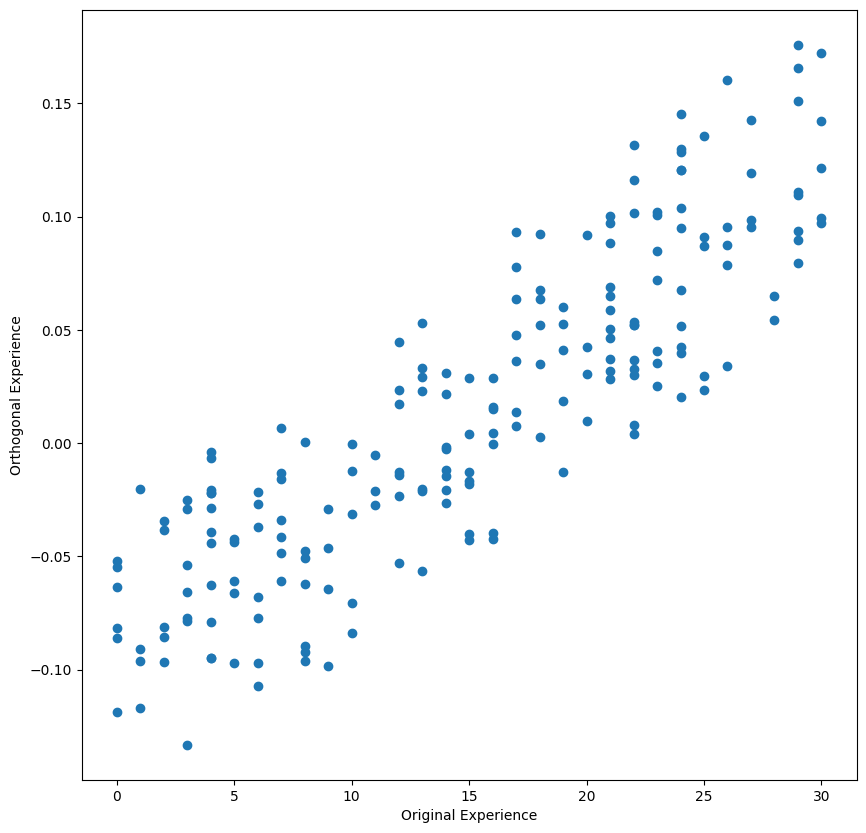

In [561]:
plt.scatter(exper_original, orthog_educ)
plt.xlabel("Original Experience")
plt.ylabel("Orthogonal Experience")
plt.show()

### Inference

There exists somewhat of a linear relationship between experience before and
after being orthogonalised.  
The orthogonalisation process is designed to preserve the linear relationships between the original predictor variables and the dependent variable while removing multicollinearity. It does not alter the fundamental linear relationships that exist in the data.

# Unsupervised Learning

In [ ]:
# airplane_data

## Unsupervised Principal Component Analysis

In [ ]:
airplane_data

In [282]:
preprocessed_df = copy_dataframe(airplane_data) #.copy() # creating a deep copy
preprocessed_df = dropna_dataframe(airplane_data, ["Location","Operator","Route","Type","Aboard","Fatalities","Ground"]) # dropping all columns with NA in them
preprocessed_df = getcols_dataframe(preprocessed_df,["Location","Operator","Route","Type","Aboard","Fatalities","Ground"]) # extracting only the relevant columns
preprocessed_df = label_encode_alphabetically(preprocessed_df,"Location") # Label encoding the data
preprocessed_df = label_encode_alphabetically(preprocessed_df,"Operator") # Label encoding the data
preprocessed_df = label_encode_alphabetically(preprocessed_df,"Route") # Label encoding the data
preprocessed_df = label_encode_alphabetically(preprocessed_df,"Type") # Label encoding the data

print("Dimensions of new data: ",dimensions_dataframe(preprocessed_df))
# print_dataframe(preprocessed_df)

HERE [142, 411, 564, 573, 588, 596, 704, 904, 1500, 1916, 1918, 1978, 2914, 2953, 3868, 3880, 4034, 4043, 4975, 5039, 61, 67, 106, 138, 164, 359, 482, 545, 618, 704, 772, 975, 2041, 2775, 3176, 4525, 4602, 5140, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 122, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 149, 151, 152, 153, 154, 155, 156, 157, 158, 160, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 192, 194, 195, 200, 201, 202, 203, 204, 205, 206, 207, 209, 

In [291]:
X_1 = preprocessed_df['Location Encoded']
X_2 = preprocessed_df['Operator Encoded']
X_3 = preprocessed_df['Route Encoded']
X_4 = preprocessed_df['Type Encoded']
X_5 = preprocessed_df['Aboard']
X_6 = preprocessed_df['Fatalities']
X_7 = preprocessed_df['Ground']
unsuper_pca_df_fin = []
for i in range(dimensions_dataframe(preprocessed_df)[0]):
  element_list = [X_1[i], X_2[i], X_3[i], X_4[i], X_5[i], X_6[i], X_7[i]]
  # X_mlrm.append(np.array(element_list))
  unsuper_pca_df_fin.append(element_list)

unsuper_pca_df = np.array(unsuper_pca_df_fin)


In [292]:
unsuper_pca_df

array([[5.650e+02, 1.187e+03, 8.240e+02, ..., 2.000e+00, 1.000e+00,
        0.000e+00],
       [8.000e+01, 1.193e+03, 2.956e+03, ..., 5.000e+00, 5.000e+00,
        0.000e+00],
       [2.363e+03, 7.710e+02, 3.092e+03, ..., 5.000e+00, 5.000e+00,
        0.000e+00],
       ...,
       [8.500e+01, 1.600e+02, 2.498e+03, ..., 2.280e+02, 2.280e+02,
        0.000e+00],
       [1.849e+03, 1.625e+03, 1.660e+03, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [2.710e+03, 1.133e+03, 1.796e+03, ..., 1.300e+01, 1.300e+01,
        0.000e+00]])

In [ ]:
unsuper_pca_ele = PCA(2)
throw_1, throw_2, eigenvalues_PCAUNSUP = unsuper_pca_ele.fit(unsuper_pca_df)
unsup_pca_projected = unsuper_pca_ele.transform(unsuper_pca_df)
print("Shape of X:", unsuper_pca_df.shape)
print("Shape of transformed X:", unsup_pca_projected.shape)

In [590]:
covariance_matrix = np.cov(throw_1, rowvar=False)
# Calculate the eigenvalues of the covariance matrix
eigenvalues = np.linalg.eigvals(covariance_matrix)

# Calculate the explained variance ratios
explained_variance_ratios = eigenvalues/(np.sum(eigenvalues_PCAUNSUP))
# Print the explained variance for each component
for i,explained_variance in enumerate(explained_variance_ratios):
  print (f"Explained Variance for Principal Component {i+1}: {explained_variance:.4f}")

Explained Variance for Principal Component 1: 0.2512
Explained Variance for Principal Component 2: 0.1705


## K-Means

In [408]:
def kmeans(data, k, max_iters=10000):

    # Randomly initializing cluster centroids
    centroids = np.random.choice(list(data), size=k, replace=False)
    point_to_cluster = {}

    for _ in range(max_iters):

        point_to_cluster_idx = 0
        # Assigning each data point to the nearest cluster
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [np.linalg.norm(point - centroid) for centroid in centroids] # calculating the norm between each point and the centroid
            cluster_index = np.argmin(distances) # finding the index of the minimum distance
            clusters[cluster_index].append(point) # adding the point to the corresponding cluster list

            point_to_cluster[point_to_cluster_idx] = cluster_index # storing which point maps to which cluster
            point_to_cluster_idx += 1

        # Updating the cluster centroids
        new_centroids = [np.mean(cluster, axis=0) for cluster in clusters]

        # Checking for convergence
        # if np.allclose(centroids, new_centroids, rtol=1e-8): #
        #     break

        centroids = new_centroids # updating the centroids

    return centroids, clusters, point_to_cluster

def kmeans_multiple(data, k, max_iters=10000):

    num_samples, num_features = dimensions_dataframe(data)
    n_rows = num_samples
    n_cols = num_features


    list_col = [] # appending all column names
    for i in data: # iterating through all column names
      list_col.append(i)

    # Randomly initialize cluster centroids
    centroids_indices = np.random.choice(n_rows, size=k, replace=False) # random list of initial indices

    centroids = [] # empty list of centroids
    for i in centroids_indices: # iterating through all the centroids_indices
      list_ele = [] # list of elements
      for j in list_col: # iterating through the column names
        element = data[j][i] # accessing element using dataframe[column name][centroid indice]
        list_ele.append(element) # appending each element to list_ele

      centroids.append(list_ele)  # Use randomly selected data points as centroids

    point_to_cluster = {}

    for _ in range(max_iters):
        # Assign each data point to the nearest cluster
        clusters = [[] for _ in range(k)]
        point_to_cluster_idx = 0


        for i in range(n_rows):
            point = []
            for j in list_col:
                point.append(data[j][i])

            # point = [data["Location Encoded"][i],data["Operator Encoded"][i]]
            point = np.array(point)
            distances = [np.linalg.norm(point - centroid) for centroid in centroids]  # Calculate Euclidean distances
            cluster_index = np.argmin(distances)  # Find the index of the minimum distance
            clusters[cluster_index].append(point)  # Add the point to the corresponding cluster list

            point_to_cluster[point_to_cluster_idx] = cluster_index  # Store which point maps to which cluster
            point_to_cluster_idx += 1

        # Update cluster centroids
        new_centroids = [np.mean(cluster, axis=0) for cluster in clusters]

        # Check for convergence by comparing centroids
        # if np.allclose(centroids, new_centroids, rtol=1e-8):
        #     break

        centroids = new_centroids  # Update the centroids

    return centroids, clusters, point_to_cluster



In [ ]:
# airplane_data["Ground"][0]
# for i in airplane_data:
#   print(i)

### 1D Data

In [ ]:
# reprocessed_df = dropna_dataframe(airplane_data, ["Location","Operator","Route","Type","Aboard","Fatalities","Ground"]) # dropping all columns with NA in them
# preprocessed_df = getcols_dataframe(preprocessed_df,["Location","Operator","Route","Type","Aboard","Fatalities","Ground"]) # extracting only the relevant columns
# preprocessed_df = label_encode_alphabetically(preprocessed_df,"Location") # Label encoding the data
# preprocessed_df = label_encode_alphabetically(preprocessed_df,"Operator") # Label encoding the data
# preprocessed_df = label_encode_alphabetically(preprocessed_df,"Route") # Label encoding the data

In [409]:
type_df = dropna_dataframe(airplane_data, ["Type"]) # dropping invalid values
type_df = label_encode_alphabetically(type_df, "Type")
# print_dataframe(type_df)

dimensions_dataframe(type_df)


HERE [49, 52, 61, 86, 97, 114, 138, 220, 359, 545, 567, 632, 678, 717, 767, 768, 772, 773, 806, 1144, 1190, 1355, 1386, 2289, 4399, 4602, 5094]


(5241, 14)

In [482]:
k_in_kmeans = 3
centroids_typecol, clusters_typecol, ptocluster_typecol = kmeans(type_df["Type Encoded"],k_in_kmeans,1000)

In [ ]:
clusters_typecol

In [491]:
# type_df["Aboard"]
len(clusters_typecol)
# centroids_typecol
# ptocluster_typecol
silhouette_list_type = []
for i in range(len(clusters_typecol)):
  # print(clusters_locop[i])
  for j in clusters_typecol[i]:
    list_sil = [j]
    silhouette_list_type.append(list_sil)

silhouette_list_type = np.array(silhouette_list_type)
silhouette_list_type

array([[2336],
       [2350],
       [2352],
       ...,
       [1307],
       [1387],
       [ 827]])

In [504]:
PTOCLUSTERFINAL_type = []
cluter_no = 0
for i in clusters_typecol:
  for j in i:
    PTOCLUSTERFINAL_type.append(cluter_no)
  cluter_no+=1



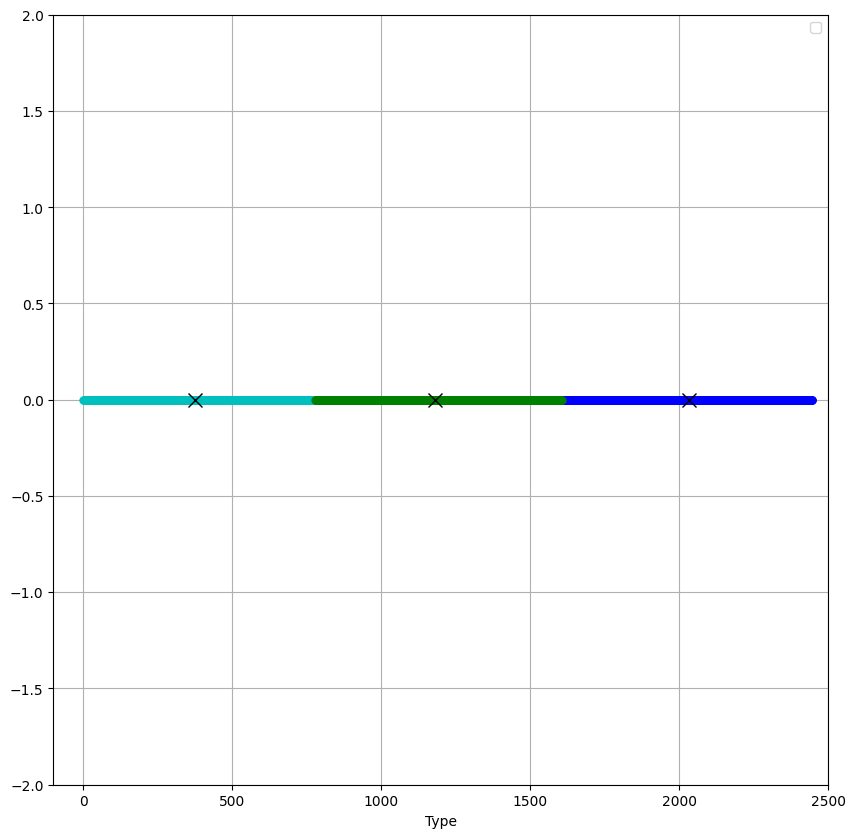

In [492]:
colour_list = ['b','c','g','pink','m','r','w','y']
plt.rcParams["figure.figsize"] = [10.00,10.00]
plt.rcParams["figure.autolayout"] = False
plt.xlim(-100,2500)
plt.ylim(-2,2)
plt.grid()
# plt.plot(x, y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
for i in range(len(clusters_typecol)):
  for j in clusters_typecol[i]:
    x = j
    y = 0
    # colour = colour_list[ptocluster_typecol[i]]
    colour = colour_list[i]

    plt.plot(x, y, marker="o", markersize=5, color=colour)

for i in centroids_typecol:
  x = i
  y = 0
  plt.plot(x, y, marker="x", markersize=10, color="black")

plt.xlabel("Type")
plt.legend()
plt.grid(True)


plt.show()

### 2D Data

#### Location & Operator

In [337]:
locop_df = dropna_dataframe(airplane_data,["Location","Operator"])
locop_df = label_encode_alphabetically(locop_df, "Location")
locop_df = label_encode_alphabetically(locop_df, "Operator")
del_list_dict = []
for i in locop_df:
  if i not in ["Location Encoded","Operator Encoded"]:
    del_list_dict.append(i)

for i in del_list_dict:
  del locop_df[i]

# print_dataframe(locop_df)
dimensions_dataframe(locop_df)

HERE [142, 411, 564, 573, 588, 596, 704, 904, 1500, 1916, 1918, 1978, 2914, 2953, 3868, 3880, 4034, 4043, 4975, 5039, 61, 67, 106, 138, 164, 359, 482, 545, 618, 704, 772, 975, 2041, 2775, 3176, 4525, 4602, 5140]


(5231, 2)

In [358]:
# locop_df

In [339]:
k_in_kmeans = 4
centroids_locop, clusters_locop, ptocluster_locop = kmeans_multiple(locop_df,k_in_kmeans,1000)


In [508]:
for i in clusters_locop:
  print(len(i))

1341
1082
1465
1343


In [510]:
# np.array(list(ptocluster_locop.values()))

In [511]:
# for j in clusters_locop[0]:
#   print(j[0], type(j))

In [512]:
silhouette_list_locop = []
for i in range(len(clusters_locop)):
  # print(clusters_locop[i])
  for j in clusters_locop[i]:
    list_sil = [j[0],j[1]]
    silhouette_list_locop.append(list_sil)

silhouette_list_locop = np.array(silhouette_list_locop)
silhouette_list_locop

array([[ 786,  378],
       [ 228,  630],
       [ 635, 1057],
       ...,
       [ 173, 1475],
       [1717, 1607],
       [2143, 1591]])

In [513]:
PTOCLUSTERFINAL_locop = []
cluter_no = 0
for i in clusters_locop:
  for j in range(len(i)):
    PTOCLUSTERFINAL_locop.append(cluter_no)
  cluter_no+=1



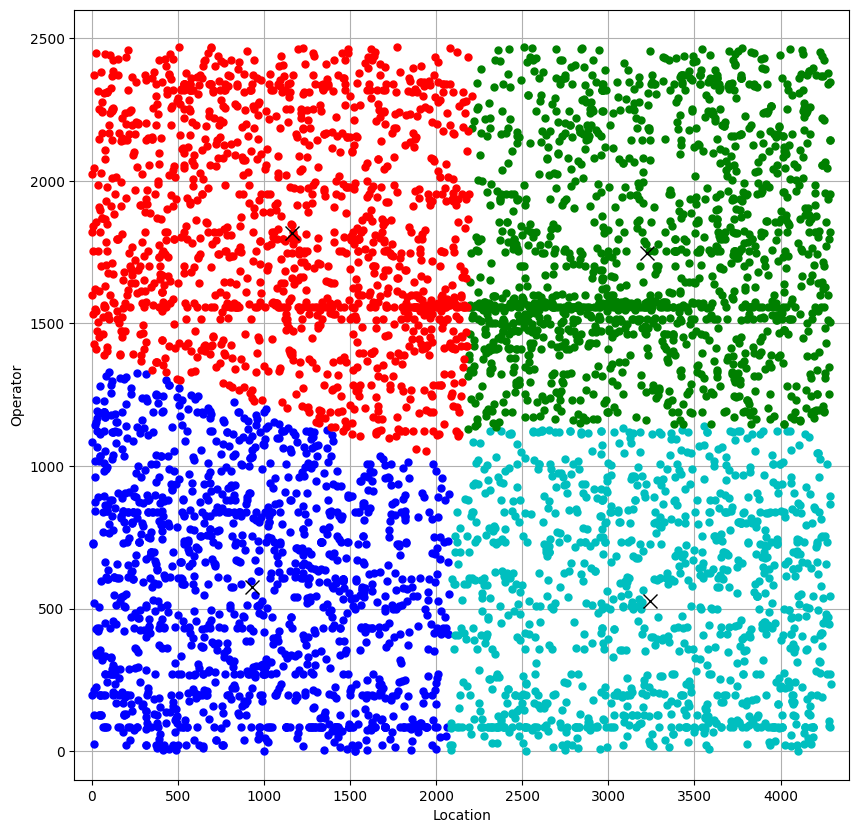

In [490]:
colour_list = ['b','c','g','r','m','pink','w','y']
plt.rcParams["figure.figsize"] = [10.00,10.00]
plt.rcParams["figure.autolayout"] = False
plt.xlim(-100,4400)
plt.ylim(-100,2600)
plt.grid()

for i in range(len(clusters_locop)):
  x = None
  y = None
  colour = colour_list[i]
  for j in clusters_locop[i]:
    x = j[0]
    y = j[1]
    # colour = colour_list[ptocluster_typecol[i]]
    plt.plot(x, y, marker="o", markersize=5, color=colour)


  # plt.plot(x, y, marker="o", markersize=5, color=colour)

for i in range(len(centroids_locop)):
  x = centroids_locop[i][0]
  y = centroids_locop[i][1]
  plt.plot(x, y, marker="x", markersize=10, color="black")


plt.xlabel("Location")
plt.ylabel("Operator")
plt.show()

###### Inference

The cluster sizes are relatively equal which indiactes that our clustering has been performed adequately. This is supported by the silhouette score which is 0.3702497536708594 and is moderate.







#### Route & Fatalities

In [603]:
from collections import OrderedDict
route_df = dropna_dataframe(airplane_data,["Route","Fatalities"])
new_dict_route = {}
list_fatalities_aj = []


for i in range(dimensions_dataframe(route_df)[0]):
  if route_df["Route"][i] not in new_dict_route:
    new_dict_route[route_df["Route"][i]] = 1
  else:
    new_dict_route[route_df["Route"][i]] += 1

  # new_dict_route[route_df["Route"][i]] = route_df["Fatalities"][i]

# Sorting the dictionary according to values
new_dict_route_keys = list(new_dict_route.keys())
new_dict_route_values = list(new_dict_route.values())
sorted_value_index = np.argsort(new_dict_route_values)
sorted_dict_route = {new_dict_route_keys[i]: new_dict_route_values[i] for i in sorted_value_index}

print(sorted_dict_route)

final_sorted_dict = {}
k = 1

# Label encoding according to fatalities in ascending order
for i in sorted_dict_route:
  final_sorted_dict[i] = k
  k+=1



len(sorted_dict_route)


HERE [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 122, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 149, 151, 152, 153, 154, 155, 156, 157, 158, 160, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 177, 178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 192, 194, 195, 200, 201, 202, 203, 204, 205, 206, 207, 209, 212, 214, 215, 217, 219, 224, 226, 227, 230, 232, 234, 235, 237, 239, 240, 242, 245, 246, 248, 249, 251, 252, 254, 255, 259, 260, 266, 267, 271, 272, 273, 274, 277, 278, 280, 281, 282, 283, 284, 287, 288, 2

3242

In [604]:
new_val_MAX = max(sorted_dict_route, key= lambda x: sorted_dict_route[x])
new_val_MAX, sorted_dict_route[new_val_MAX]
ii = 0
for i in sorted_dict_route:
  ii+=1
  if ii == 3242:
    print(i)


Training


In [605]:
# route_df = dropna_dataframe(airplane_data,["Route","Fatalities"])
list_fatalities = []
for i in range(dimensions_dataframe(route_df)[0]):
  fatality = final_sorted_dict[route_df["Route"][i]]
  list_fatalities.append(fatality)

route_df["Route Encoded"] = list_fatalities

# del_list_dict_route = []
# for i in route_df:
#   if i not in ["Route Encoded"]:
#     del_list_dict_route.append(i)

# for i in del_list_dict_route:
#   del route_df[i]

# print_dataframe(route_df)
dimensions_dataframe(route_df)

(3560, 14)

In [606]:
k_in_kmeans = 5
centroids_route, clusters_route, ptocluster_route = kmeans(route_df["Route Encoded"],k_in_kmeans,100)

In [607]:
for i in range(len(centroids_route)):
  print(centroids_route[i])

340.0
1700.5
3066.245215311005
2383.0
1019.5


In [608]:

### 2D
# silhouette_list_route = []
# for i in range(len(clusters_route)):
#   # print(clusters_locop[i])
#   for j in clusters_route[i]:
#     list_sil = [j[0],j[1]]
#     silhouette_list_route.append(list_sil)

# silhouette_list_route = np.array(silhouette_list_route)
# silhouette_list_route


### 1D
max_death = -1
max_death_route = None
silhouette_list_route = []
for i in range(len(clusters_route)):
  # print(clusters_locop[i])
  for j in clusters_route[i]:
    list_sil = [j]
    if j>max_death:
      max_death = j
      max_death_route = route_df["Route"][i]
    silhouette_list_route.append(list_sil)

max_death = new_val_MAX
max_death_route = sorted_dict_route[new_val_MAX]

silhouette_list_route = np.array(silhouette_list_route)
silhouette_list_route

array([[ 527],
       [ 528],
       [ 529],
       ...,
       [1071],
       [1072],
       [1073]])

In [609]:
PTOCLUSTERFINAL_route = []
cluter_no = 0
for i in clusters_route:
  for j in i:
    PTOCLUSTERFINAL_route.append(cluter_no)
  cluter_no+=1
len(PTOCLUSTERFINAL_route)


3560

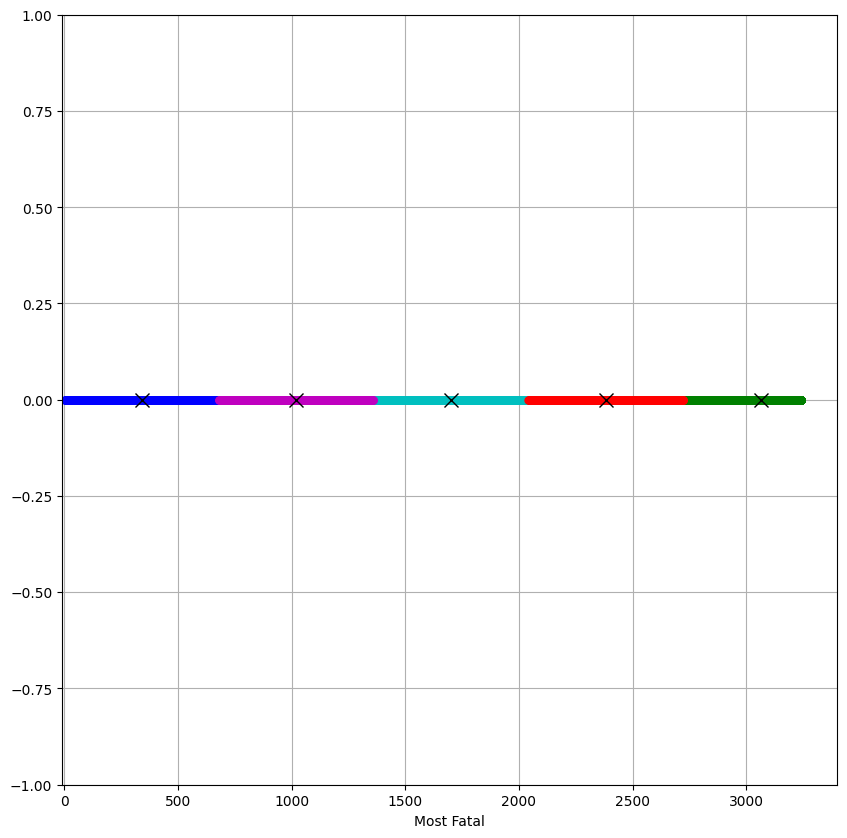

In [610]:
### 2D
# colour_list = ['b','c','g','r','m','pink','w','y']
# plt.rcParams["figure.figsize"] = [10.00,10.00]
# plt.rcParams["figure.autolayout"] = False
# plt.xlim(-10,3200)
# plt.ylim(0,600)
# plt.grid()

# for i in range(len(clusters_route)):
#   x = None
#   y = None
#   colour = colour_list[i]
#   for j in clusters_route[i]:
#     y = j[0]
#     x = j[1]
#     # colour = colour_list[ptocluster_typecol[i]]
#     plt.plot(x, y, marker="o", markersize=5, color=colour)


#   # plt.plot(x, y, marker="o", markersize=5, color=colour)

# for i in range(len(centroids_route)):
#   y = centroids_route[i][0]
#   x = centroids_route[i][1]
#   plt.plot(x, y, marker="x", markersize=10, color="black")

# plt.xlabel("Routes")
# plt.ylabel("Fatalities")


# plt.show()

### 1D
colour_list = ['b','c','g','r','m','pink','w','y']
plt.rcParams["figure.figsize"] = [10.00,10.00]
plt.rcParams["figure.autolayout"] = False
plt.xlim(-10,3400)
plt.ylim(-1,1)
plt.grid()

for i in range(len(clusters_route)):
  x = None
  y = None
  colour = colour_list[i]
  for j in clusters_route[i]:
    y = 0
    x = j
    # colour = colour_list[ptocluster_typecol[i]]
    plt.plot(x, y, marker="o", markersize=5, color=colour)


  # plt.plot(x, y, marker="o", markersize=5, color=colour)

for i in range(len(centroids_route)):
  y = 0
  x = centroids_route[i]
  plt.plot(x, y, marker="x", markersize=10, color="black")

plt.xlabel("Most Fatal")


plt.show()

In [611]:
print("Max deaths: ", max_death)
print("Most dangerous route: ", max_death_route)

Max deaths:  Training
Most dangerous route:  81


##### Inference


Since the data has been labelly encoded by increasing number of crashes the the most fatal accidents will be in the rightmost cluster. The route with label index 3242, that is, "Training" is the most fatal route of all and has seen 81 crashes.





## Silhouette Score

In [483]:

def euclidean_distance(point1, point2):
  """ Calculate the Euclidean distance between two points """

  return math.sqrt(np.sum((point1 - point2) ** 2))


def silhouette_score(data, labels):
  """ Calculate the silhouette score """

  num_samples = len(data)  # total number of data points
  unique_labels = np.unique(labels)  # finding only the unique cluster labels
  silhouette_values = np.zeros(num_samples)  # initialising an array to store silhouette values for each data point



  for i in range(num_samples):
    cluster_i = labels[i]  # cluster_i holds the cluster label for the current (ith) data point
    a_i = 0.0  # a_i will measure the average distance within the same cluster
    b_i = math.inf  # b_i will measure the minimum average distance to other clusters


    # Calculating a_i
    cluster_size_i = np.sum(labels == cluster_i)  # calculating the number of points in cluster i
    if cluster_size_i > 1:
      for j in range(num_samples): # iterating over all data points
        if labels[j] == cluster_i and i != j: # excluding the current point
          a_i += euclidean_distance(data[i], data[j]) # calculating the euclidean distance between the ith and jth points

      #a_i /= (cluster_size_i - 1)  # Calculating the average, subtracting 1 to avoid division by 0
      a_i /= cluster_size_i  # Calculating the average
    else:
      a_i = -99

    # Calculate b_i
    for cluster_j in unique_labels: # iterating over all clusters
      if cluster_j != cluster_i: # excluding the same cluster
        cluster_size_j = np.sum(labels == cluster_j)  # calculating the number of points in cluster j
        b_ij = 0.0  # average distance of point i to cluster j
        for j in range(num_samples): # iterating over all points
          if labels[j] == cluster_j: # checking if the jth point is in cluster j
            b_ij += euclidean_distance(data[i], data[j]) # calculating the euclidean distance between the ith and jth points
        b_ij /= cluster_size_j  # calculating the average distance
        b_i = min(b_i, b_ij)  # updating the minimum average distance for point i

    # calculating the silhouette value for the current point
    silhouette_values[i] = 1 - (a_i/b_i)
    # silhouette_values[i] = (b_i - a_i) / max(a_i, b_i)


  # returning the mean silhouette score for all data points
  return np.mean(silhouette_values)




In [ ]:
# # Example
# data = np.array([[1, 2], [2, 3], [3, 4], [8, 9], [9, 10], [10, 11]])
# labels = np.array([0, 0, 0, 1, 1, 1])

# score = silhouette_score(data, labels)
# print("Silhouette Score:", score)
# np.unique(np.array(list(ptocluster_locop.values())))

In [506]:
# print("Silhoutte score for Type: ", silhouette_score(silhouette_list_type, np.array(list(ptocluster_typecol.values()))))
print("Silhoutte score for Type: ", silhouette_score(silhouette_list_type, np.array(PTOCLUSTERFINAL_type)))

Silhoutte score for Type:  0.6084272953593072


In [516]:
print("Silhoutte score for Location & Operator: ",silhouette_score(silhouette_list_locop, np.array(PTOCLUSTERFINAL_locop)))

Silhoutte score for Location & Operator:  0.3702497536708594


In [548]:
print("Silhoutte score for Route & Fatalities: ", silhouette_score(silhouette_list_route, np.array(PTOCLUSTERFINAL_route)))

Silhoutte score for Route & Fatalities:  0.5801560427944256


### **Observations**

The silhouette score typically ranges between -1 and 1, with values closer to 1 indicating better clusterings.

Near 1: The data point is well inside its own cluster and far from other clusters, indicating a good clustering.

Near 0: The data point is on or very close to the boundary between two neighboring clusters. This can indicate overlapping clusters.

Near -1: The data point may have been assigned to the wrong cluster. This can happen when the data point is closer to a different cluster's centroid than its own.

The order of the silhouette scores is as follows:  
Location and Operator < Route and Fatalities < Type  

Thus `Type` has the best clustering out of all the three.

A silhouette score of 0.6084 is relatively high and indicates that data points within `Type Cluster` are well-clustered and are closer to each other than to data points in other clusters.

A silhouette score of 0.5802 is also relatively high and again indicates that data points within `Route and Fatalities Cluster` are well-clustered and have good separation from other clusters.


A silhouette score of 0.3702 is moderate and suggests that `Location and Operator Cluster` is reasonably well-clustered, but there might be some overlap or proximity between other clusters.




